In [145]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
station_df = pd.read_csv('station_data.csv')
print(station_df.shape)
station_df.head()

(76, 6)


,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose


In [126]:
trip_df = pd.read_csv('trip_data.csv')
print(trip_df.shape)
trip_df.head()

(354152, 6)


,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer


In [10]:
weather_df = pd.read_csv('weather_data.csv')
print(weather_df.shape)
weather_df.head()

(1825, 24)


,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0.0,0.0,NaN,290.0,94107
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0.0,5.0,NaN,290.0,94107
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0.0,4.0,NaN,276.0,94107
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0.0,5.0,NaN,301.0,94107
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0.0,4.0,NaN,309.0,94107


# Create New Features

## Net Time

In [127]:
trip_df['Net Rate'] = pd.to_datetime(trip_df['End Date']) - pd.to_datetime(trip_df['Start Date'])

In [128]:
trip_df['Net Rate Minute'] = pd.to_datetime(trip_df['Net Rate']).dt.hour*60 + pd.to_datetime(trip_df['Net Rate']).dt.minute

C:\Users\Daniel Chang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


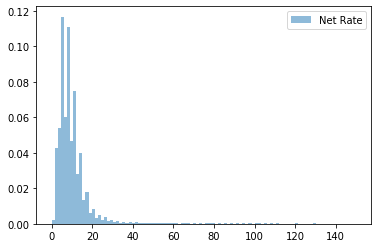

In [129]:
bins = np.linspace(0, 150, 100)

plt.hist(trip_df['Net Rate Minute'], bins, alpha=0.5, normed=True, label='Net Rate')
plt.legend(loc='upper right')
plt.show()

In [130]:
trip_df['Subscriber Type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Daniel Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


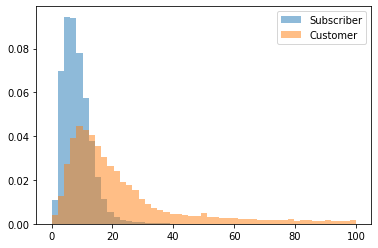

In [131]:
bins = np.linspace(0, 100, 50)

plt.hist(trip_df[trip_df['Subscriber Type']=='Subscriber']['Net Rate Minute'], bins, alpha=0.5, normed=True, label='Subscriber')
plt.hist(trip_df[trip_df['Subscriber Type']=='Customer']['Net Rate Minute'], bins, alpha=0.5, normed=True, label='Customer')
plt.legend(loc='upper right')
plt.show()

Small ride of Subscriber is more frequently than Small ride of Customer

## Travel Time

In [140]:
trip_df.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Net Rate,Net Rate Minute
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber,00:13:00,13
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber,00:17:00,17
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber,00:05:00,5
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber,00:07:00,7
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer,00:13:00,13


In [166]:
trip_df['STime Year'] = pd.to_datetime(trip_df['Start Date']).dt.year
trip_df['STime Month'] = pd.to_datetime(trip_df['Start Date']).dt.month
trip_df['STime Day'] = pd.to_datetime(trip_df['Start Date']).dt.day
trip_df['STime Hour'] = pd.to_datetime(trip_df['Start Date']).dt.hour
trip_df['STime Min'] = pd.to_datetime(trip_df['Start Date']).dt.minute
trip_df.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Net Rate,Net Rate Minute,STime Month,STime Day,STime Hour,STime Min,STime Year
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber,00:13:00,13,8,31,23,26,2015
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber,00:17:00,17,8,31,23,11,2015
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber,00:05:00,5,8,31,23,13,2015
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber,00:07:00,7,8,31,23,10,2015
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer,00:13:00,13,8,31,23,9,2015


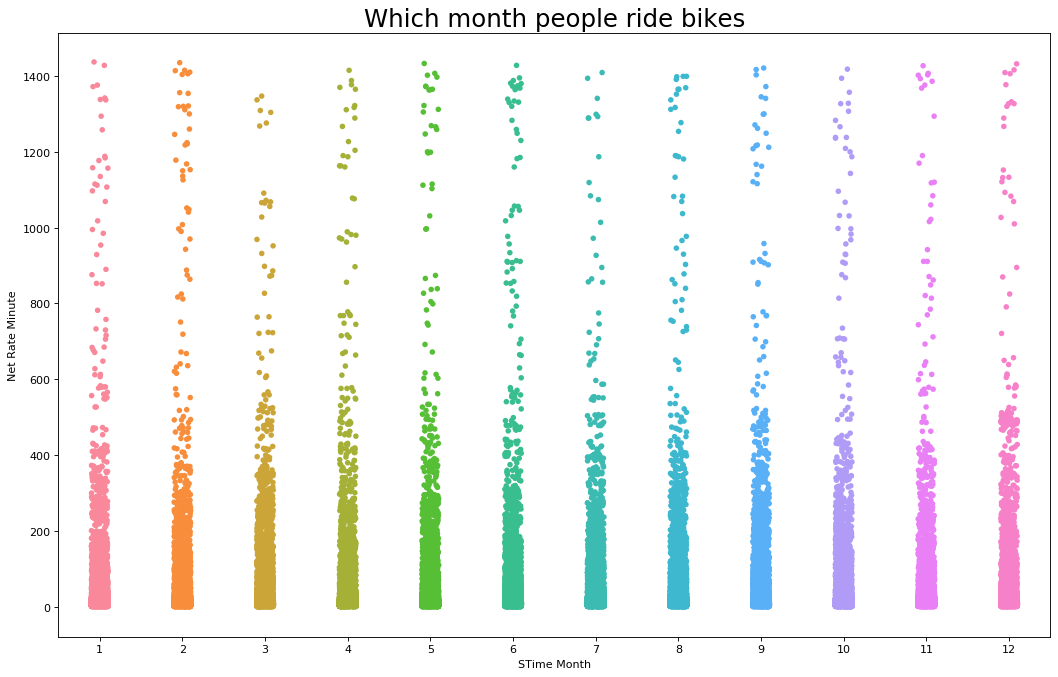

In [156]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(trip_df['STime Month'], trip_df['Net Rate Minute'], ax=ax)

# Decorations
plt.title('Which month people ride bikes', fontsize=22)
plt.show()

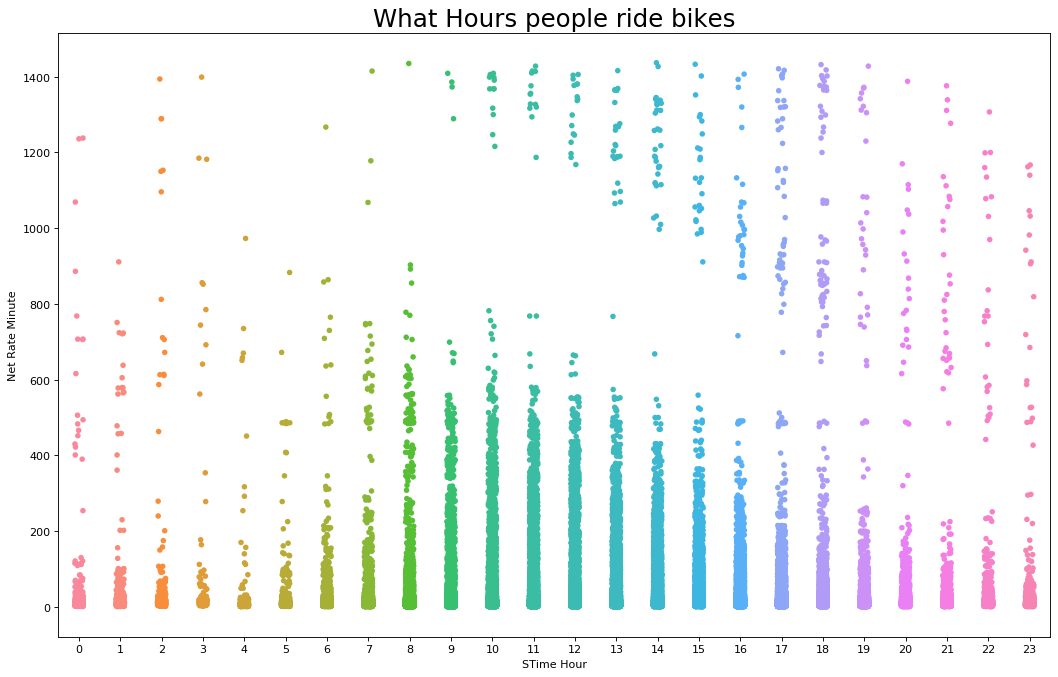

In [157]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(trip_df['STime Hour'], trip_df['Net Rate Minute'], ax=ax)

# Decorations
plt.title('What Hours people ride bikes', fontsize=22)
plt.show()

Apparently, months is a not very important feature. However, the time is very important.

## Zipcode

In [74]:
from uszipcode import Zipcode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
result = search.by_coordinates(37.329732, -121.901782, radius=1, returns=1)
result

[SimpleZipcode(zipcode='95113', zipcode_type='Standard', major_city='San Jose', post_office_city='San Jose, CA', common_city_list=['San Jose'], county='Santa Clara County', state='CA', lat=37.334, lng=-121.891, timezone='Pacific', radius_in_miles=0.5681818181818182, area_code_list=['408', '650', '669'], population=893, population_density=2618.0, land_area_in_sqmi=0.34, water_area_in_sqmi=0.0, housing_units=992, occupied_housing_units=575, median_home_value=630700, median_household_income=34345, bounds_west=-121.897377, bounds_east=-121.883855, bounds_north=37.340372, bounds_south=37.328336)]

In [88]:
print(type(result[0].zipcode))

temp = weather_df['Zip'][0]
print(type(temp))
print(type(int(result[0].zipcode)))

<class 'str'>
<class 'numpy.int64'>
<class 'int'>


In [97]:
station_df.head()

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose


In [106]:
stationZip = []
for lat,long in zip(station_df['Lat'].head(),station_df['Long'].head()):
    result = search.by_coordinates(lat, long, radius=1, returns=1)
    stationZip.append(int(result[0].zipcode))
stationZip

[95113, 95113, 95113, 95113, 95113]

In [111]:
stationZip = []
for lat,long in zip(station_df['Lat'],station_df['Long']):
    result = search.by_coordinates(lat, long, radius=3, returns=1)
    stationZip.append(int(result[0].zipcode))
len(stationZip)

76

In [112]:
station_df.shape

(76, 6)

In [113]:
station_df['Zip']=stationZip
station_df

,Id,Name,Lat,Long,Dock Count,City,Zip
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,95113
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,95113
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,95113
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,95113
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,95113
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,95113
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,95113
7,9,Japantown,37.348742,-121.894715,15,San Jose,95112
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,95113
9,11,MLK Library,37.335885,-121.885660,19,San Jose,95113


# Create Train with Features

## Merge Zipcode 

We need to merge Zipcode in order to merge the Weahter to the same dataframe.
We also can group the region of people together, and use it as a feature.

In [194]:
train = trip_df.merge(station_df[['Id','Zip']], left_on='Start Station', right_on='Id')
train = train.drop(['Id'], axis=1)
train = train.rename(columns={"Zip": "Start Zip"})
train

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Net Rate,Net Rate Minute,STime Month,STime Day,STime Hour,STime Min,STime Year,Start Zip
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber,0 days 00:13:00,13,8,31,23,26,2015,94105
1,913415,31/08/2015 20:53,50,31/08/2015 20:58,54,Subscriber,0 days 00:05:00,5,8,31,20,53,2015,94105
2,913349,31/08/2015 20:00,50,31/08/2015 20:09,61,Subscriber,0 days 00:09:00,9,8,31,20,0,2015,94105
3,913228,31/08/2015 18:47,50,31/08/2015 19:02,70,Subscriber,0 days 00:15:00,15,8,31,18,47,2015,94105
4,913166,31/08/2015 18:25,50,31/08/2015 18:35,71,Subscriber,0 days 00:10:00,10,8,31,18,25,2015,94105
5,913131,31/08/2015 18:09,50,31/08/2015 18:23,88,Subscriber,0 days 00:14:00,14,8,31,18,9,2015,94105
6,913029,31/08/2015 17:46,50,31/08/2015 17:57,61,Subscriber,0 days 00:11:00,11,8,31,17,46,2015,94105
7,913009,31/08/2015 17:40,50,31/08/2015 17:53,70,Subscriber,0 days 00:13:00,13,8,31,17,40,2015,94105
8,912956,31/08/2015 17:31,50,31/08/2015 17:48,70,Subscriber,0 days 00:17:00,17,8,31,17,31,2015,94105
9,912946,31/08/2015 17:29,50,31/08/2015 17:42,65,Subscriber,0 days 00:13:00,13,8,31,17,29,2015,94105


In [195]:
train = train.merge(station_df[['Id','Zip']], left_on='End Station', right_on='Id')
train = train.drop(['Id'], axis=1)
train = train.rename(columns={"Zip": "End Zip"})
train

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Net Rate,Net Rate Minute,STime Month,STime Day,STime Hour,STime Min,STime Year,Start Zip,End Zip
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber,0 days 00:13:00,13,8,31,23,26,2015,94105,94158
1,913228,31/08/2015 18:47,50,31/08/2015 19:02,70,Subscriber,0 days 00:15:00,15,8,31,18,47,2015,94105,94158
2,913009,31/08/2015 17:40,50,31/08/2015 17:53,70,Subscriber,0 days 00:13:00,13,8,31,17,40,2015,94105,94158
3,912956,31/08/2015 17:31,50,31/08/2015 17:48,70,Subscriber,0 days 00:17:00,17,8,31,17,31,2015,94105,94158
4,912776,31/08/2015 16:50,50,31/08/2015 17:04,70,Subscriber,0 days 00:14:00,14,8,31,16,50,2015,94105,94158
5,912720,31/08/2015 16:33,50,31/08/2015 16:44,70,Subscriber,0 days 00:11:00,11,8,31,16,33,2015,94105,94158
6,912718,31/08/2015 16:28,50,31/08/2015 16:39,70,Subscriber,0 days 00:11:00,11,8,31,16,28,2015,94105,94158
7,912471,31/08/2015 13:06,50,31/08/2015 13:22,70,Subscriber,0 days 00:16:00,16,8,31,13,6,2015,94105,94158
8,912046,31/08/2015 08:50,50,31/08/2015 09:01,70,Subscriber,0 days 00:11:00,11,8,31,8,50,2015,94105,94158
9,911149,29/08/2015 19:39,50,29/08/2015 19:57,70,Subscriber,0 days 00:18:00,18,8,29,19,39,2015,94105,94158


## Merge Weather

In [170]:
weather_df['STime Year'] = pd.to_datetime(weather_df['Date']).dt.year
weather_df['STime Month'] = pd.to_datetime(weather_df['Date']).dt.month
weather_df['STime Day'] = pd.to_datetime(weather_df['Date']).dt.day
weather_df.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip,STime Year,STime Month,STime Day
0,01/09/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,7.0,20.0,0.0,0.0,NaN,290.0,94107,2014,1,9
1,02/09/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,8.0,NaN,0.0,5.0,NaN,290.0,94107,2014,2,9
2,03/09/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,8.0,24.0,0.0,4.0,NaN,276.0,94107,2014,3,9
3,04/09/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,8.0,25.0,0.0,5.0,NaN,301.0,94107,2014,4,9
4,05/09/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,8.0,32.0,0.0,4.0,NaN,309.0,94107,2014,5,9


In [ ]:
weather_df = weather_df.rename(columns={"Zip": "Start Zip"})

In [196]:
train_with_nan = train.merge(weather_df, on=['STime Year','STime Month','STime Day','Start Zip'], how="left")
train_with_nan

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Net Rate,Net Rate Minute,STime Month,STime Day,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber,0 days 00:13:00,13,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,913228,31/08/2015 18:47,50,31/08/2015 19:02,70,Subscriber,0 days 00:15:00,15,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,913009,31/08/2015 17:40,50,31/08/2015 17:53,70,Subscriber,0 days 00:13:00,13,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,912956,31/08/2015 17:31,50,31/08/2015 17:48,70,Subscriber,0 days 00:17:00,17,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,912776,31/08/2015 16:50,50,31/08/2015 17:04,70,Subscriber,0 days 00:14:00,14,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,912720,31/08/2015 16:33,50,31/08/2015 16:44,70,Subscriber,0 days 00:11:00,11,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,912718,31/08/2015 16:28,50,31/08/2015 16:39,70,Subscriber,0 days 00:11:00,11,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,912471,31/08/2015 13:06,50,31/08/2015 13:22,70,Subscriber,0 days 00:16:00,16,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,912046,31/08/2015 08:50,50,31/08/2015 09:01,70,Subscriber,0 days 00:11:00,11,8,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,911149,29/08/2015 19:39,50,29/08/2015 19:57,70,Subscriber,0 days 00:18:00,18,8,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
train_weather = train.merge(weather_df, on=['STime Year','STime Month','STime Day','Start Zip'], how="inner")
train_weather

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,Net Rate,Net Rate Minute,STime Month,STime Day,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,608728,18/01/2015 10:28,35,18/01/2015 15:36,70,Customer,0 days 05:08:00,308,1,18,...,10.0,6.0,0.0,12.0,4.0,NaN,0.0,4.0,Fog,340.0
1,608715,18/01/2015 10:07,35,18/01/2015 15:36,70,Customer,0 days 05:29:00,329,1,18,...,10.0,6.0,0.0,12.0,4.0,NaN,0.0,4.0,Fog,340.0
2,608714,18/01/2015 10:07,35,18/01/2015 15:37,70,Customer,0 days 05:30:00,330,1,18,...,10.0,6.0,0.0,12.0,4.0,NaN,0.0,4.0,Fog,340.0
3,695326,24/03/2015 13:04,11,24/03/2015 21:23,76,Customer,0 days 08:19:00,499,3,24,...,10.0,10.0,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0
4,695351,24/03/2015 13:18,10,24/03/2015 13:48,10,Subscriber,0 days 00:30:00,30,3,24,...,10.0,10.0,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0
5,694786,24/03/2015 08:35,2,24/03/2015 08:46,10,Subscriber,0 days 00:11:00,11,3,24,...,10.0,10.0,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0
6,695593,24/03/2015 16:36,10,24/03/2015 16:42,2,Subscriber,0 days 00:06:00,6,3,24,...,10.0,10.0,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0
7,696103,24/03/2015 18:56,2,24/03/2015 18:57,2,Subscriber,0 days 00:01:00,1,3,24,...,10.0,10.0,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0
8,696053,24/03/2015 18:41,4,24/03/2015 18:46,2,Subscriber,0 days 00:05:00,5,3,24,...,10.0,10.0,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0
9,695970,24/03/2015 18:10,4,24/03/2015 18:15,2,Subscriber,0 days 00:05:00,5,3,24,...,10.0,10.0,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0


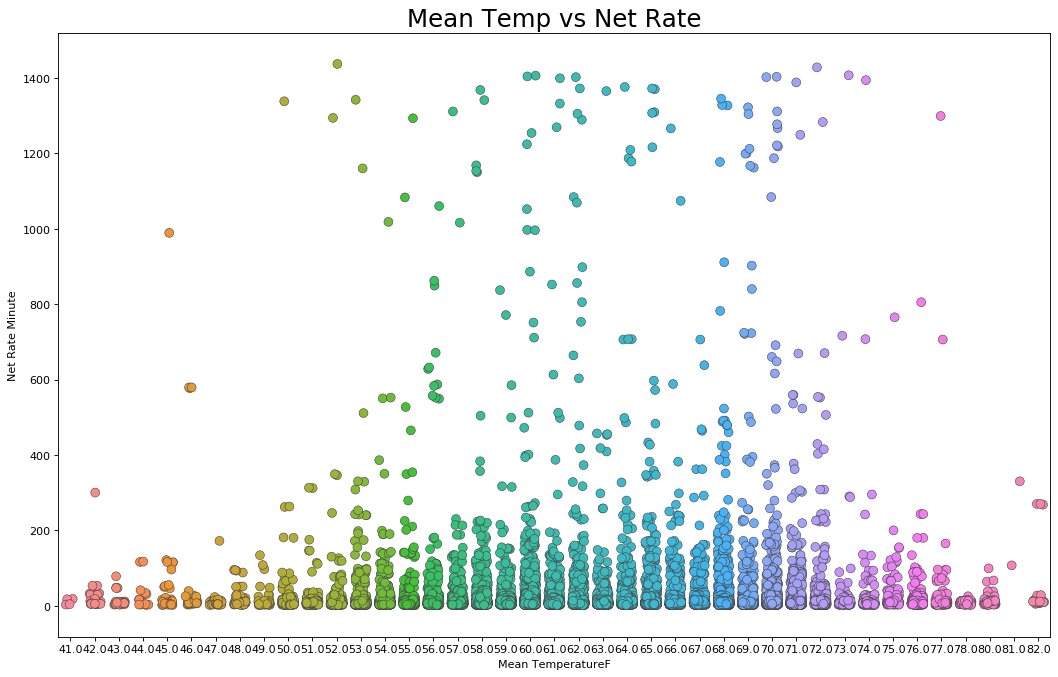

In [200]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(train_no_nan['Mean TemperatureF'], train_no_nan['Net Rate Minute'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Mean Temp vs Net Rate', fontsize=22)
plt.show()

As we can see, people enjoy riding bikes between temp 53 to 73

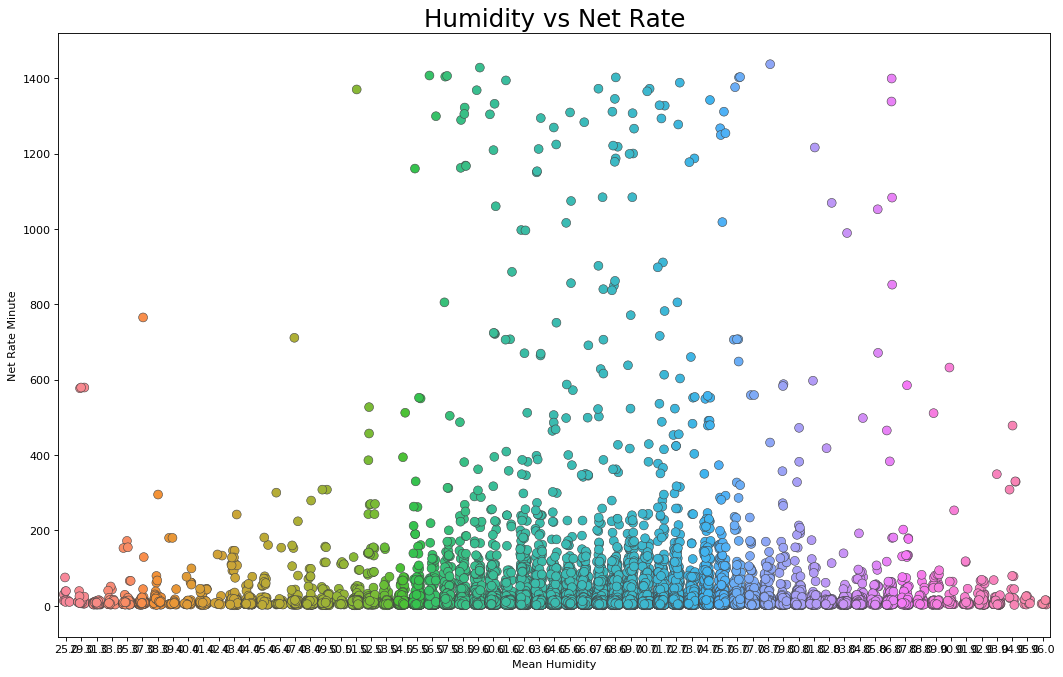

In [225]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(train_weather['Mean Humidity'], train_weather['Net Rate Minute'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Humidity vs Net Rate', fontsize=22)
plt.show()

As we can see, people enjoy riding bikes between Humidity 55 to 80

In [217]:
train_weather['Events'] = train_weather['Events'].fillna("Nothing-Special")
train_weather['Events'].unique()

array(['Fog', 'Nothing-Special', 'Rain', 'Fog-Rain'], dtype=object)

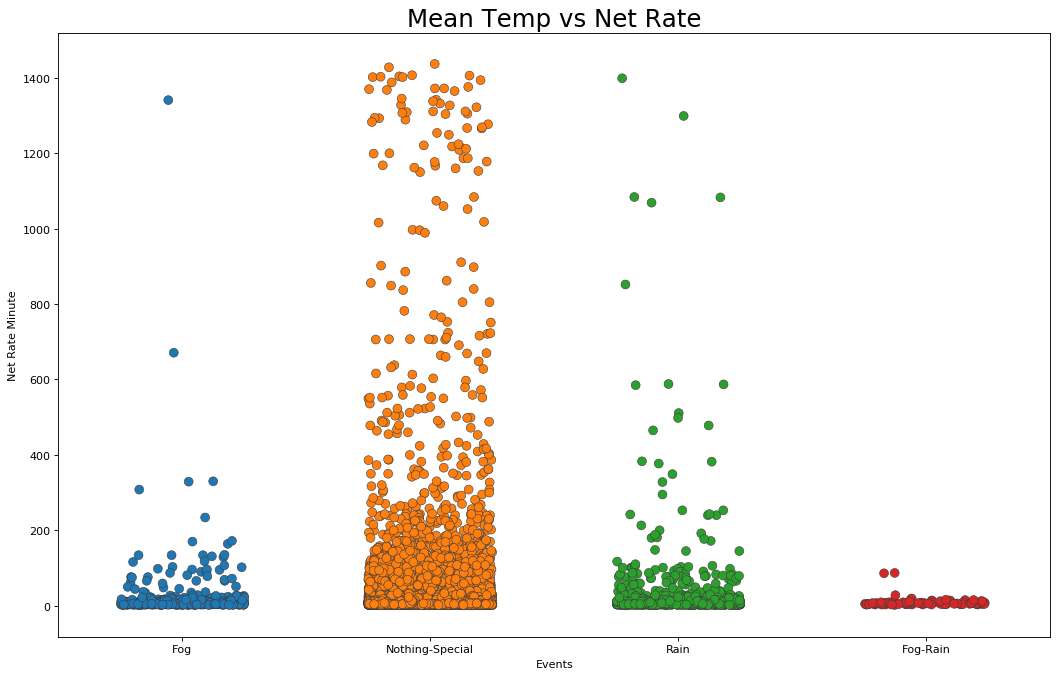

In [221]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(train_weather['Events'], train_weather['Net Rate Minute'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Mean Temp vs Net Rate', fontsize=22)
plt.show()

As we can see the label of the weather is very important.
If is fog or rain or both, then the net rate would be very low

Conclusion: Weather Features are important

# Features

In [218]:
features = ['Trip ID','Start Station','End Station','Subscriber Type', 'Net Rate Minute', 'STime Month', 'STime Hour',
            'STime Min','Start Zip','End Zip']
features = list(dict.fromkeys(features+list(weather_df.columns.values)))
features.remove('Date')
features

['Trip ID',
 'Start Station',
 'End Station',
 'Subscriber Type',
 'Net Rate Minute',
 'STime Month',
 'STime Hour',
 'STime Min',
 'Start Zip',
 'End Zip',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 'Mean Humidity',
 'Min Humidity',
 'Max Sea Level PressureIn',
 'Mean Sea Level PressureIn',
 'Min Sea Level PressureIn',
 'Max VisibilityMiles',
 'Mean VisibilityMiles',
 'Min VisibilityMiles',
 'Max Wind SpeedMPH',
 'Mean Wind SpeedMPH',
 'Max Gust SpeedMPH',
 'PrecipitationIn',
 'CloudCover',
 'Events',
 'WindDirDegrees',
 'STime Year',
 'STime Day']

In [219]:
X = train_no_nan[features]
X.head()

,Trip ID,Start Station,End Station,Subscriber Type,Net Rate Minute,STime Month,STime Hour,STime Min,Start Zip,End Zip,...,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,STime Year,STime Day
0,608728,35,70,Customer,308,1,10,28,94301,94158,...,0.0,12.0,4.0,NaN,0.0,4.0,Fog,340.0,2015,18
1,608715,35,70,Customer,329,1,10,7,94301,94158,...,0.0,12.0,4.0,NaN,0.0,4.0,Fog,340.0,2015,18
2,608714,35,70,Customer,330,1,10,7,94301,94158,...,0.0,12.0,4.0,NaN,0.0,4.0,Fog,340.0,2015,18
3,695326,11,76,Customer,499,3,13,4,95113,94104,...,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0,2015,24
4,695351,10,10,Subscriber,30,3,13,18,95113,95113,...,10.0,16.0,8.0,22.0,0.0,5.0,NaN,303.0,2015,24


In [220]:
X = pd.get_dummies(X,columns=['Subscriber Type','Events'])
X

,Trip ID,Start Station,End Station,Net Rate Minute,STime Month,STime Hour,STime Min,Start Zip,End Zip,Max TemperatureF,...,PrecipitationIn,CloudCover,WindDirDegrees,STime Year,STime Day,Subscriber Type_Customer,Subscriber Type_Subscriber,Events_Fog,Events_Fog-Rain,Events_Rain
0,608728,35,70,308,1,10,28,94301,94158,60.0,...,0.0,4.0,340.0,2015,18,1,0,1,0,0
1,608715,35,70,329,1,10,7,94301,94158,60.0,...,0.0,4.0,340.0,2015,18,1,0,1,0,0
2,608714,35,70,330,1,10,7,94301,94158,60.0,...,0.0,4.0,340.0,2015,18,1,0,1,0,0
3,695326,11,76,499,3,13,4,95113,94104,67.0,...,0.0,5.0,303.0,2015,24,1,0,0,0,0
4,695351,10,10,30,3,13,18,95113,95113,67.0,...,0.0,5.0,303.0,2015,24,0,1,0,0,0
5,694786,2,10,11,3,8,35,95113,95113,67.0,...,0.0,5.0,303.0,2015,24,0,1,0,0,0
6,695593,10,2,6,3,16,36,95113,95113,67.0,...,0.0,5.0,303.0,2015,24,0,1,0,0,0
7,696103,2,2,1,3,18,56,95113,95113,67.0,...,0.0,5.0,303.0,2015,24,0,1,0,0,0
8,696053,4,2,5,3,18,41,95113,95113,67.0,...,0.0,5.0,303.0,2015,24,0,1,0,0,0
9,695970,4,2,5,3,18,10,95113,95113,67.0,...,0.0,5.0,303.0,2015,24,0,1,0,0,0


# Modeling

I would use "XGBRegressor" from XGBoost. Check every steps if the model make it overfit.

Then, use "plot_features" to check the importance of features.

If I want to increase the performance, I would try normalize the weather data and fill the NaNs for bigger dataset